<a href="https://colab.research.google.com/github/lovelessbhartal12/machine-learning-codebase/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [2]:
x,y=make_classification(n_features=5, n_redundant=0 ,n_informative=5,n_clusters_per_class=1)


In [3]:
df=pd.DataFrame(x,columns=['f1','f2','f3','f4','f5'])
df['target']=y
df.head()


,f1,f2,f3,f4,f5,target
0,-1.147565,-2.512462,-1.217334,1.727519,1.698743,1
1,0.771887,-1.353562,-2.899767,-1.420030,0.378913,0
2,-1.371795,1.292815,0.871073,2.025115,2.459620,1
3,-0.034094,-0.255342,-0.519468,2.037827,-0.335728,1
4,4.575320,-0.781405,-2.883202,-4.356000,-2.447679,0


In [4]:
# Function for sampling
def sample_rows(df, percent):
    return df.sample(n=int(percent * df.shape[0]), replace=True)


In [5]:
def sample_columns(df, percent):
    num_cols = int(percent * df.shape[1])
    return df.sample(n=num_cols, axis=1, replace=False)


In [6]:
def sample_rows_and_columns(df, row_percent, col_percent, replace_rows=True, replace_cols=False):
    num_rows = int(row_percent * df.shape[0])
    num_cols = int(col_percent * df.shape[1])

    sampled_rows = df.sample(n=num_rows, axis=0, replace=replace_rows)
    sampled_df = sampled_rows.sample(n=num_cols, axis=1, replace=replace_cols)

    return sampled_df


In [7]:
df1=sample_rows(df,0.1)

In [8]:
df2=sample_rows(df,0.1)


In [9]:
df3=sample_rows(df,0.1)

In [10]:
df2.head()

,f1,f2,f3,f4,f5,target
95,2.286671,-0.855191,-0.607287,-1.503393,-2.369605,0
39,0.813256,-1.662935,-1.150037,-1.170594,-1.672447,0
0,-1.147565,-2.512462,-1.217334,1.727519,1.698743,1
20,-1.223361,1.667953,-0.152707,0.298173,0.982755,1
83,-2.673982,-0.782253,-2.273572,0.539054,-2.076608,1


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()

clf3=DecisionTreeClassifier()

In [12]:
clf1.fit(df.iloc[:,0:5],df.iloc[:,-1])
clf2.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf3.fit(df2.iloc[:,0:5],df2.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.7142857142857143, 0.9166666666666666, 'x[0] <= 0.573\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5714285714285714, 0.75, 'x[3] <= 0.126\ngini = 0.328\nsamples = 63\nvalue = [13, 50]'),
 Text(0.6428571428571428, 0.8333333333333333, 'True  '),
 Text(0.42857142857142855, 0.5833333333333334, 'x[0] <= -0.249\ngini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(0.2857142857142857, 0.4166666666666667, 'x[0] <= -0.736\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.42857142857142855, 0.25, 'x[4] <= 0.93\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2857142857142857, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.4166666666666667, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.7142857142857143, 0.5833333333333334, 'gini = 0.0\nsamples = 41\nvalu

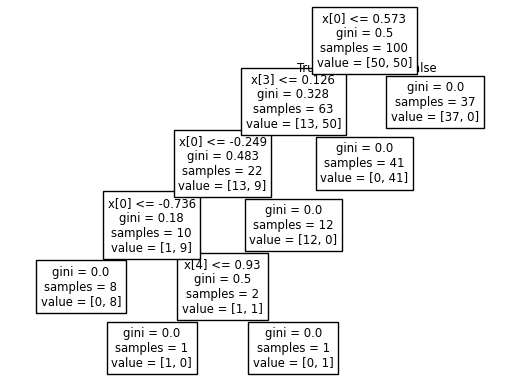

In [13]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.5, 0.75, 'x[3] <= 0.009\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.625, 0.5, '  False')]

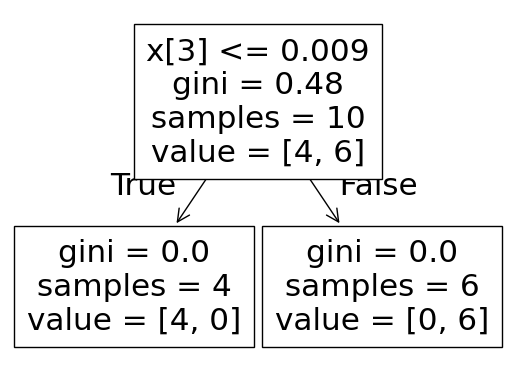

In [14]:
plot_tree(clf2)


[Text(0.5, 0.75, 'x[3] <= -0.371\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.625, 0.5, '  False')]

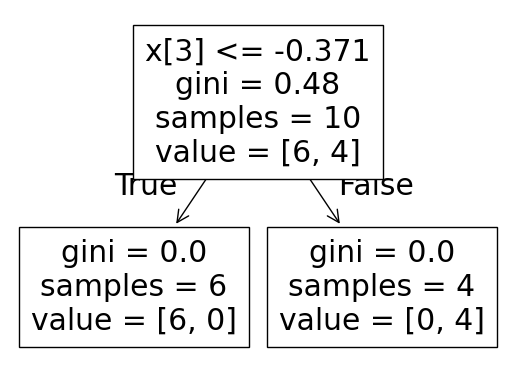

In [15]:
plot_tree(clf3)

In [16]:
clf1.predict(np.array([-1.545353,0.285158,0.761898,-1.147536,-0.790798]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [17]:
clf2.predict(np.array([-1.545353,0.285158,0.761898,-1.147536,-0.790798]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [18]:
clf3.predict(np.array([-1.545353,0.285158,0.761898,-1.147536,-0.790798]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [24]:
np.random.seed(42)
x,y=make_circles(n_samples=500, factor=0.1, noise=0.35,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x.shape

(500, 2)

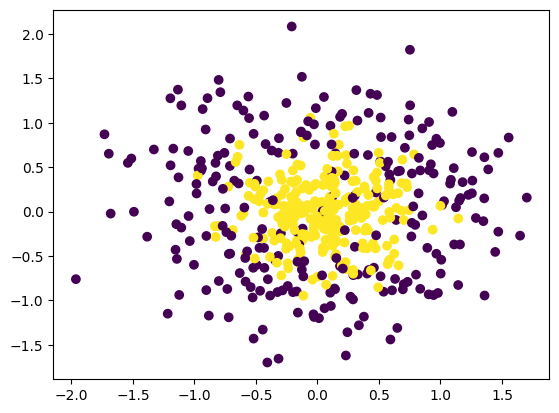

In [25]:
plt.scatter(x[:,0],x[:,1],c=y)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier(max_depth=2)



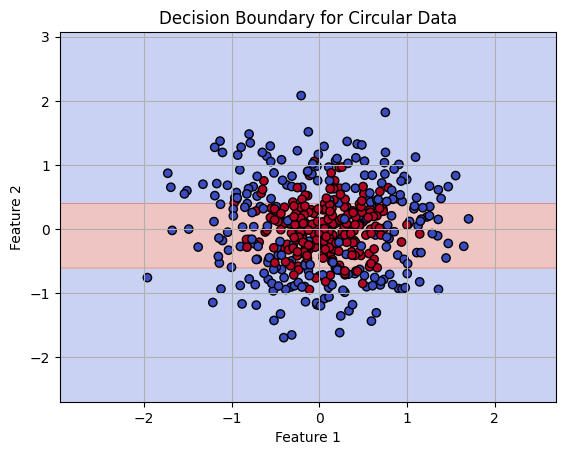

In [44]:
dt.fit(x_train,y_train)
plot_decision_boundary(dt,x,y)

In [42]:
def plot_decision_boundary(clf, X, y):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("Decision Boundary for Circular Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()


In [45]:
import pandas as pd
import numpy as np

In [49]:
df=pd.read_csv('/content/heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [51]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]


,target
0,0
1,0
2,0
3,0
4,0


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [77]:

rf=RandomForestClassifier(n_estimators=100,max_depth=None,)
gb=GradientBoostingClassifier()
svm=SVC()
lr=LogisticRegression()

In [78]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9853658536585366

In [69]:
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9317073170731708

In [70]:
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.6829268292682927

In [71]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7804878048780488

In [73]:
from sklearn.model_selection import cross_val_score
mean_accuracy = np.mean(cross_val_score(RandomForestClassifier(n_estimators=100), x, y, cv=10, scoring='accuracy'))
print("Mean Accuracy (10-fold CV):", mean_accuracy)

Mean Accuracy (10-fold CV): 0.9970588235294118


In [79]:
n_estimators = [20, 50, 100, 200]
max_features=[0.6,0.2,1.0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1.0]

In [80]:
para_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'max_samples':max_samples
}
print(para_grid)

{'n_estimators': [20, 50, 100, 200], 'max_features': [0.6, 0.2, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()

In [87]:
rf_grid=GridSearchCV(estimator=rf,param_grid=para_grid,cv=3,n_jobs=-1,verbose=2)


In [88]:
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.6, 0.2, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 50, 100, 200]},
             verbose=2)

In [90]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 50}

In [91]:
rf_grid.best_score_

np.float64(0.9829148953236545)

feature importance


In [96]:
#feature importance in random forest
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [97]:
x,y=make_classification(n_samples=5,n_classes=2, n_features=2,n_informative=2,n_redundant=0,random_state=42)

In [100]:
clf=DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[0] <= -0.245\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.625, 0.5, '  False')]

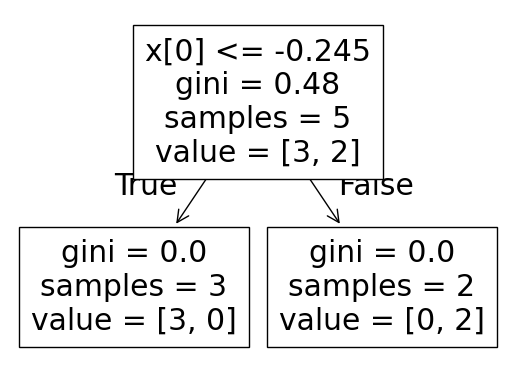

In [101]:
from sklearn.tree import plot_tree
plot_tree(clf)


In [102]:
clf.feature_importances_

array([1., 0.])